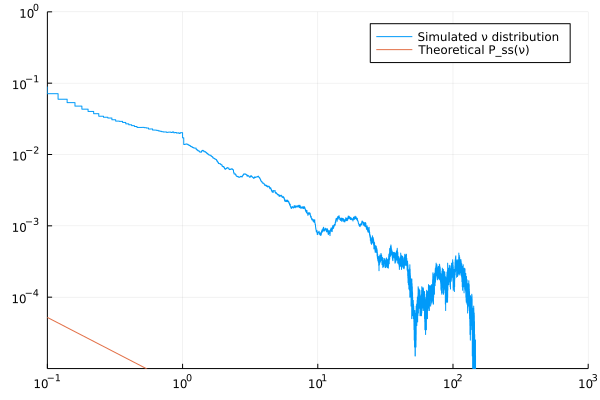

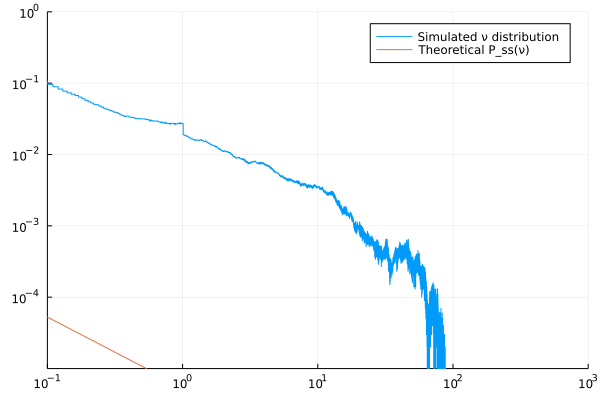

In [3]:
using Plots

# パラメータの定義
ν_0 = 0.01  # 背景強度
τ = 1.0    # 時間減衰
dt = 0.001 # サンプリング時間間隔
T = 10000  # サンプリング時間

# 分岐比 n を変えて2つのシミュレーションを行う
n_values = [0.999, 0.99]

# 強度ν(t)の計算関数
function calculate_ν(t, events, n, ν_0, τ)
    ν_t = ν_0 + sum((1/τ) * exp.(-(t .- events[events .<= t]) / τ))
    return ν_t
end

# P_{ss}(ν)の式
P_ss(ν, ν_0, τ, n) = ν^(-1 + 2*ν_0*τ) * exp(-2*τ*(1-n)*ν)

# νのヒストグラムとP_{ss}(ν)のプロット関数
function plot_intensity_distribution(n, ν_0, τ, T, dt)
    events = Float64[]
    t = 0.0
    while t <= T
        ν_t = calculate_ν(t, events, n, ν_0, τ)
        if rand() < ν_t*dt
            push!(events, t)
        end
        t += dt
    end
    
    intensities = [calculate_ν(t, events, n, ν_0, τ) for t in 0:dt:T]
    histogram(intensities, normed=true, label="Simulated ν distribution", xscale=:log10, yscale=:log10, xticks=10.0 .^ (-1:3), yticks=10.0 .^ (-5:0), xlims=(10^-1, 10^3), ylims=(10^-5, 10^0))

    ν_range = 10.0 .^ (-1:0.01:3)
    P_ss_values = [P_ss(ν, ν_0, τ, n) for ν in ν_range]
    plot!(ν_range, P_ss_values / sum(P_ss_values) * diff(ν_range)[1], line=:solid, label="Theoretical P_ss(ν)")
end

# n = 0.999 と n = 0.99 の場合の強度分布のプロット
for n in n_values
    plot_intensity_distribution(n, ν_0, τ, T, dt)
    display(plot!())
end
